Name:

KhAleD FoUaD

Specialization & Track:

Advanced Data Analysis Nanodegree Program

Cohort: 14

Aug.-Oct. 2021

# Project: Investigate a Dataset - The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project we'll be analyzing data associated with The Movie Database (TMDb). In particular, we'll be interested in finding trends among people and movies properties and how are relations could be.

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
Questions to be explored over the course of the report:

-What could be the relation between movies and years?

-How are the movies ratings performing?

-What's the performance of the film industry profits over years?

-Which genres are most popular from year to year?

-What kinds of properties are associated with movies that have high revenues?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# read into a dataframe using the pandas library
TMDb_df=pd.read_csv('tmdb-movies.csv')
# view the dataframe, reading and understanding what's there
TMDb_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
# to see all of columns [No column(s) in the middle is hidden]
pd.set_option('display.max_columns', None)

In [4]:
# view all
TMDb_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [5]:
# dimensions
TMDb_df.shape

(10866, 21)

In [6]:
# columns names of The Movie Database (TMDb)
print(list(TMDb_df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [7]:
# reveal several information

# summary of TMDb
TMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# summary descriptive statistics
TMDb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
Discussing the structure of the data and any problems that need to be cleaned.

A. release_date column data type is string, convert to datetime
 
B. Drop duplicates if any
 
C. Drop columns won't used
 
D. Drop null & 0 values
 
E. Drop nan values from cast column, keep rows or movies with actors

In [9]:
# A. release_date column data type is string, convert to datetime
TMDb_df['release_date']=pd.to_datetime(TMDb_df['release_date'])
# will be confirmed with info method

In [10]:
# B. Drop duplicates if any
# check duplicate data
TMDb_df.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [11]:
# count duplicates
sum(TMDb_df.duplicated())

1

In [12]:
# drop this one duplicate
TMDb_df.drop_duplicates(inplace=True)

In [13]:
# confirm
sum(TMDb_df.duplicated())

0

In [14]:
# C. Drop columns won't used
# dropping columns: id, imdb_id, homepage, tagline, keywords, overview
dropping=["id","imdb_id","homepage","tagline","keywords","overview"]
TMDb_df.drop(dropping, axis=1, inplace=True)
print("Removed Unused Cols. (Rows,Columns):",TMDb_df.shape)

Removed Unused Cols. (Rows,Columns): (10865, 15)


In [15]:
# D. Drop null & 0 values
# number of 0 values in budget & revenue columns
print("Zero values rows in budget column:",TMDb_df[(TMDb_df['budget']==0)].shape[0])
print("Zero values rows in revenue column:",TMDb_df[(TMDb_df['revenue']==0)].shape[0])

Zero values rows in budget column: 5696
Zero values rows in revenue column: 6016


In [16]:
# replace all 0 with NAN
TMDb_df=TMDb_df.replace(0, np.nan)

In [17]:
# confirm
print("Zero values rows in budget column:",TMDb_df[(TMDb_df['budget']==0)].shape[0])
print("Zero values rows in revenue column:",TMDb_df[(TMDb_df['revenue']==0)].shape[0])

Zero values rows in budget column: 0
Zero values rows in revenue column: 0


In [18]:
# dropping null
TMDb_df=TMDb_df.dropna()

In [19]:
# confirm
TMDb_df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [20]:
# E. Drop nan values from cast column, keep rows or movies with actors
TMDb_df=TMDb_df[TMDb_df["cast"].isnull() == False]

In [21]:
# check cleaning, and confirm datatime dtype of release_date column
TMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3805 non-null   float64       
 1   budget                3805 non-null   float64       
 2   revenue               3805 non-null   float64       
 3   original_title        3805 non-null   object        
 4   cast                  3805 non-null   object        
 5   director              3805 non-null   object        
 6   runtime               3805 non-null   float64       
 7   genres                3805 non-null   object        
 8   production_companies  3805 non-null   object        
 9   release_date          3805 non-null   datetime64[ns]
 10  vote_count            3805 non-null   int64         
 11  vote_average          3805 non-null   float64       
 12  release_year          3805 non-null   int64         
 13  budget_adj       

In [22]:
# summary descriptive statistics
TMDb_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


**Now we've trimmed and cleaned data**

<a id='eda'></a>
## Exploratory Data Analysis

Moving on to exploration; *Computing statistics and creating visualizations* in order to address the research questions that we posed in the Introduction section, and investigating them from multiple angles along with looking at relationships between variables.\
We'll compute the relevant statistics throughout the analysis, and as part of the exploration, we'll compare and show trends in the varied visualizations.

### Research Question 1
##### What could be the relation between movies and years?
Two variables;

the independent variable is time in release_year column,

and the dependent variable is number of movies.

First, calculate number of movies of every year in release_years column, and sort years.

Then visualize the result to conclude.

Text(0, 0.5, 'Year')

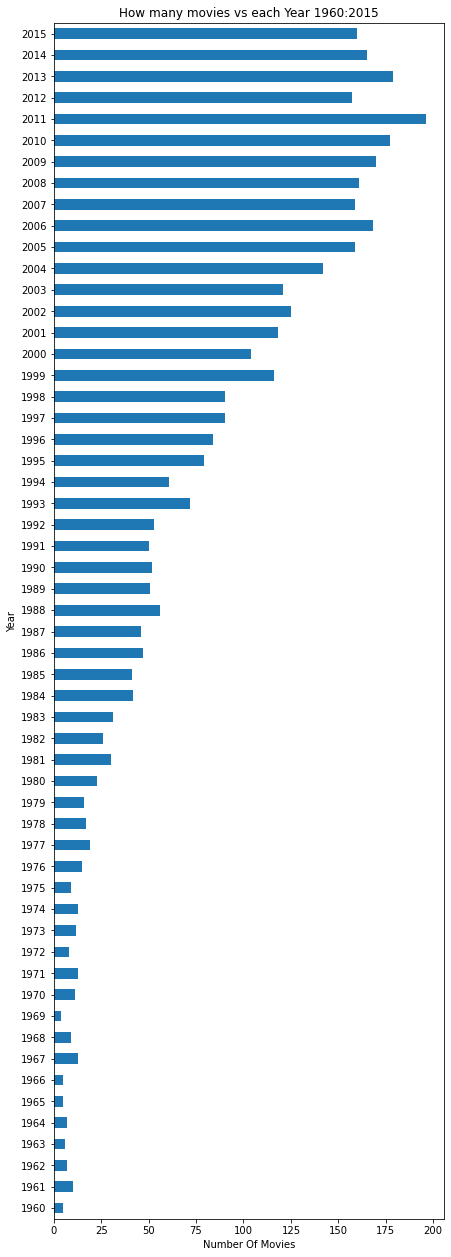

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# counting number of movies each year then sorting result
movies_year=TMDb_df['release_year'].value_counts().sort_index()

# plot relation between release_year & number of movies
movies_year.plot(kind='barh',title='How many movies vs each Year 1960:2015',figsize=(7,22))

plt.xlabel('Number Of Movies')

plt.ylabel('Year')

### Research Question 2
##### How are the movies ratings performing?
Two variables;

the independent variable is the time in release_year column,

and the dependent variable is movie rating in vote_average column.

Group the table by release_year and calculate the mean of vote_average for each year.

First, calculate the mean of one column then group the result by another column. This will be used in this question and the next.

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# defining a function to calculate the mean of column2 and groupby column1
def groupby_avg(col1,col2):
    avg_grbby_data=TMDb_df.groupby(col1)[col2].mean()
    return avg_grbby_data

Now visualize the result to conclude.

Text(0, 0.5, 'Average Rating')

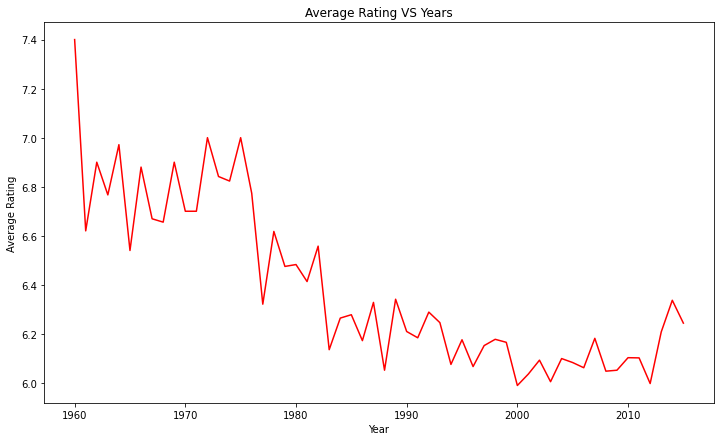

In [25]:
# call the groupby_avg function,
#   passing release_year and vote_average arguments
avg_rtg_yr=groupby_avg('release_year','vote_average')

# plot the relation between release_year and vote_average
avg_rtg_yr.plot(kind='line',color='red',title='Average Rating VS Years',figsize = (12,7))

plt.xlabel('Year')

plt.ylabel('Average Rating')

### Research Question 3
##### What's the performance of the film industry profits over years?
Two variables;

the independent variable is the time in release_year column,

and the dependent variable is movie rating in profit column.

First, calculate the profit; subtracting budget column from revenue column, and adding a new column with the name profit.

In [26]:
# Adding a new column from subtracting two columns and make it the first
TMDb_df.insert(1,'profit',TMDb_df['revenue']-TMDb_df['budget'])
TMDb_df.head()

,popularity,profit,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Group the table by release_year and calculate the mean of vote_average for each year.

Now visualize the result to conclude.

Text(0, 0.5, 'Profit')

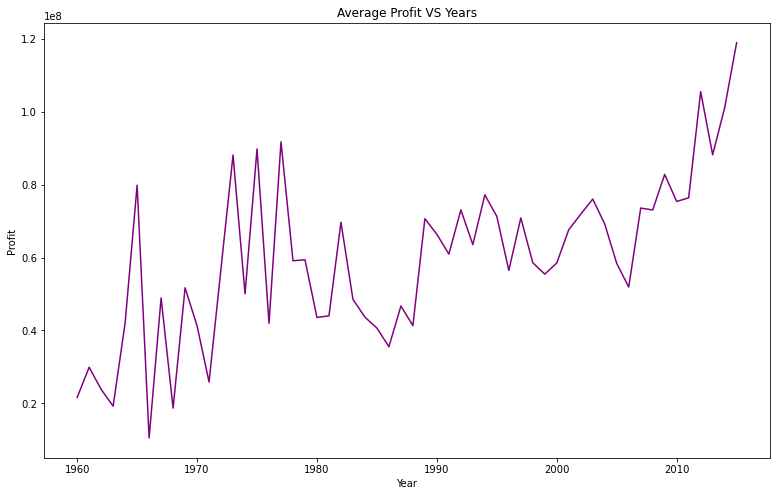

In [27]:
# call the groupby_avg function,
#   passing release_year and profit arguments
avg_prft_yr=groupby_avg('release_year','profit')

# plot the relation between release_year and profit
avg_prft_yr.plot(kind='line',color='purple',title='Average Profit VS Years',figsize = (13,8))

plt.xlabel('Year')

plt.ylabel('Profit')

### Research Question 4
##### Which genres are most popular from year to year?

In [28]:
TMDb_df.groupby(['genres','release_year']).mean().popularity

genres                            release_year
Action                            1988            1.392581
                                  1993            0.207999
                                  2001            0.208670
                                  2002            1.936728
                                  2003            0.626183
                                                    ...   
Western|Drama                     2014            0.870104
Western|Drama|Adventure|Thriller  2015            9.110700
Western|History                   1980            0.128234
Western|History|War               2004            0.948560
Western|Thriller                  2013            0.387592
Name: popularity, Length: 2699, dtype: float64

In [29]:
# list rows of genres
all_genre=list(map(str,(TMDb_df['genres'])))
genre=['Adventure','Science Fiction','Fantasy','Thriller','Crime','Family','nan','Animation','War','Mystery','Romance','TV Movie','Action','Western','Comedy','Drama','History','Music','Horror','Documentary','Foreign']

# numpy array of year and popularity
year=np.array(TMDb_df['release_year'])
popularity=np.array(TMDb_df['popularity'])

# make a dataframe; indexs are genres, columns are years
popular_df=pd.DataFrame(index=genre,columns=range(1960,2016))

# change all values of dataframe from NAN to zero
popular_df=popular_df.fillna(value=0.0)

z = 0
for i in all_genre:
    split_genre=list(map(str,i.split('|')))
    popular_df.loc[split_genre,year[z]]=popular_df.loc[split_genre,year[z]]+popularity[z]
    z+=1

In [30]:
# calculate the standard deviation
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre=calculate_std(popular_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.705931,1.437183,2.710171,1.923461,1.022476,1.665470,1.132612,2.442594,2.298155,1.999674,2.217052,0.181026,0.141051,0.050503,0.252530,1.912900,0.166745,2.637844,0.954145,0.934319,1.840939,2.321878,1.208585,1.645337,1.018289,2.529170,0.854551,0.853181,-0.085483,1.473778,1.036213,0.918670,0.988978,0.875257,-0.174388,0.456655,0.924435,0.801858,1.037082,0.171426,0.794563,1.333807,1.260243,1.327608,1.207117,1.258994,0.902660,0.719983,1.124030,1.376754,1.440654,0.925992,1.173951,1.318622,1.641152,1.891133
Science Fiction,-0.717114,-0.762280,-0.623943,-0.750602,-0.911998,-0.781827,0.029983,-0.831207,1.984656,-0.686877,-0.215226,2.129752,-0.052152,-0.009859,-0.206368,0.013793,0.166745,2.053197,0.413439,2.453278,1.820138,0.289014,2.122359,1.261648,1.417649,0.787561,0.811977,0.886964,-0.227922,0.673115,0.678860,0.329196,-0.028615,-0.276629,-0.227378,0.100340,0.353704,1.017127,0.293314,0.812828,-0.101423,-0.353892,0.314780,0.125726,0.433805,-0.007220,-0.259325,-0.381611,0.201840,0.994912,0.033606,0.400927,0.396914,0.808104,1.256819,1.437719
Fantasy,-0.717114,-0.762280,-0.623943,-0.750602,0.307291,-0.781827,-0.732002,-0.715169,-0.711085,-0.686877,-0.920975,0.345230,-0.490449,-0.846575,-0.672831,0.476214,-0.734967,-0.031187,0.117499,-0.756918,-0.323236,-0.538356,0.488527,-0.376733,0.795046,0.085120,0.246805,-0.211605,0.039659,-0.089325,0.032498,0.497299,-0.036475,0.092453,0.061076,-0.039768,0.142702,-0.069310,-0.353653,0.282628,0.046949,1.076099,0.236950,1.093027,-0.043835,0.529745,0.191600,0.594812,0.073803,0.315721,0.308548,0.214153,0.309076,0.010017,0.031096,-0.300706
Thriller,1.267074,-0.762280,1.548754,2.698983,1.429420,1.064274,0.748643,0.404524,-0.240488,1.308705,-0.623321,1.874726,0.408733,1.789946,1.749888,0.815654,1.733970,0.095580,1.819456,1.715001,0.379746,1.186049,1.963390,1.625939,0.596324,0.367141,0.504310,1.706708,1.424562,0.815032,1.576048,1.637769,2.064787,1.218037,1.487659,1.873089,1.945797,2.426028,0.981461,1.233946,1.597297,1.049655,1.366575,1.465452,1.108816,1.041808,1.588797,1.917356,1.531056,1.389162,1.531537,1.694955,1.527107,1.409517,1.095913,1.674218
Crime,-0.717114,-0.177595,-0.068337,-0.750602,-0.505053,-0.781827,-0.732002,0.474892,-0.240488,0.835902,-0.540985,0.654037,2.788885,1.534865,2.211906,-0.621031,1.209678,-0.562567,-0.587601,-0.602110,-0.194439,-0.758782,-0.560103,0.443770,-0.251766,-0.583321,-0.101597,0.388810,0.476197,-0.205273,0.649446,0.582661,1.590377,0.500504,1.725514,0.842268,0.467632,0.380232,0.554651,0.275170,0.434601,0.149486,0.115813,0.323764,-0.012011,0.303980,0.137034,0.443363,0.510871,-0.469852,-0.066672,0.119784,0.168556,0.502316,-0.327002,0.069980


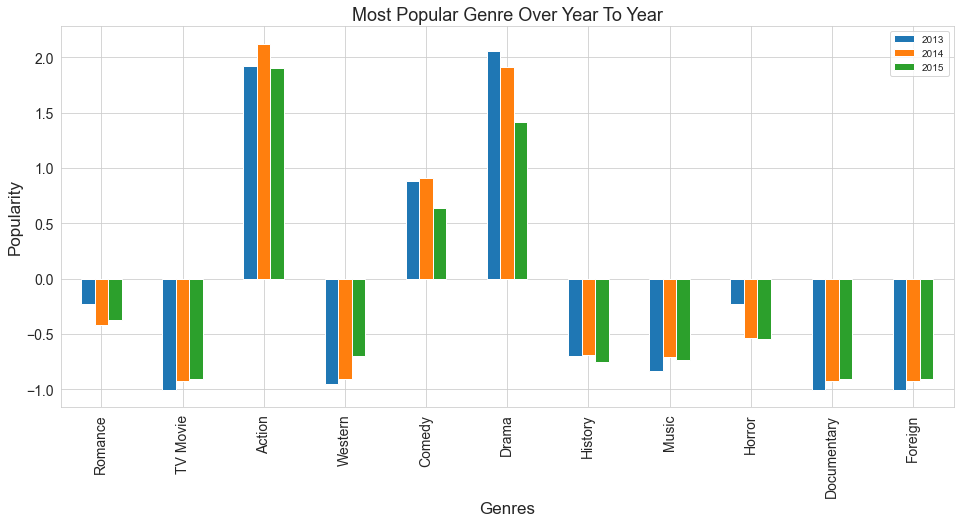

In [44]:
# bar plot of the standardised data
popular_genre.iloc[10:,53:].plot(kind='bar',figsize=(16,7),fontsize=14)

# title and labels of the plot
plt.title("Most Popular Genre Over Year To Year",fontsize=18)
plt.xlabel("Genres",fontsize=17)
plt.ylabel("Popularity",fontsize=17)
sns.set_style("whitegrid")

### Research Question 5
##### What kinds of properties are associated with movies that have high revenues?

In [32]:
TMDb_df.groupby(['vote_average']).mean().revenue

vote_average
2.2    7.370600e+04
3.3    1.100648e+07
3.4    5.034187e+07
3.5    7.682487e+06
3.6    2.968139e+07
3.7    2.602209e+07
3.8    1.411300e+07
3.9    2.084945e+07
4.0    2.779226e+07
4.1    3.400768e+07
4.2    3.610037e+07
4.3    3.350073e+07
4.4    5.006455e+07
4.5    2.813808e+07
4.6    3.574765e+07
4.7    4.247596e+07
4.8    3.597951e+07
4.9    3.681188e+07
5.0    5.272467e+07
5.1    6.127142e+07
5.2    5.959659e+07
5.3    6.498620e+07
5.4    6.091518e+07
5.5    9.008294e+07
5.6    1.026925e+08
5.7    7.385130e+07
5.8    9.985902e+07
5.9    8.857186e+07
6.0    9.611875e+07
6.1    1.178507e+08
6.2    9.533750e+07
6.3    1.041165e+08
6.4    1.312383e+08
6.5    1.217450e+08
6.6    1.207550e+08
6.7    8.595861e+07
6.8    1.205376e+08
6.9    1.290617e+08
7.0    1.371450e+08
7.1    1.527156e+08
7.2    1.426556e+08
7.3    1.916634e+08
7.4    2.340433e+08
7.5    2.267712e+08
7.6    2.034533e+08
7.7    2.371312e+08
7.8    2.245003e+08
7.9    3.559637e+08
8.0    2.338289e+08
8.1    

In [33]:
# check unique values
TMDb_df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [34]:
# check revenue mean associated to genres column
TMDb_df.groupby('genres').mean().revenue

genres
Action                                               1.104887e+08
Action|Adventure                                     7.877674e+07
Action|Adventure|Animation|Family|Fantasy            5.549875e+08
Action|Adventure|Animation|Family|Science Fiction    6.314421e+08
Action|Adventure|Animation|Science Fiction           5.231128e+06
                                                         ...     
Western|Drama                                        1.813148e+06
Western|Drama|Adventure|Thriller                     5.329505e+08
Western|History                                      1.579519e+07
Western|History|War                                  2.581996e+07
Western|Thriller                                     6.147000e+03
Name: revenue, Length: 1043, dtype: float64

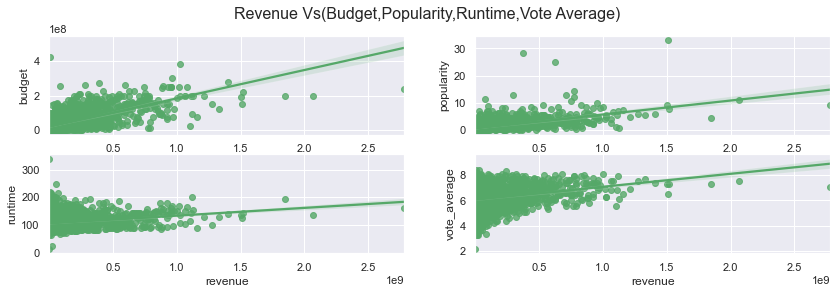

In [78]:
# extract and scatter plot what are associated with movies that have high revenues
fig,axes=plt.subplots(2,2,figsize=(14,4))
fig.suptitle('Revenue Vs(Budget,Popularity,Runtime,Vote Average)',fontsize=16)
sns.regplot(x=TMDb_df['revenue'],y=TMDb_df['budget'],color='g',ax=axes[0][0])
sns.regplot(x=TMDb_df['revenue'],y=TMDb_df['popularity'],color='g',ax=axes[0][1])
sns.regplot(x=TMDb_df['revenue'],y=TMDb_df['runtime'],color='g',ax=axes[1][0])
sns.regplot(x=TMDb_df['revenue'],y=TMDb_df['vote_average'],color='g',ax=axes[1][1])
sns.set_style('darkgrid')

<a id='conclusions'></a>
## Conclusions

**conclusion of** research question 1 What could be the relation between movies and years?

-The number of movies increases over years.

-The year released the highest number of movies; from barh plot it's 2011 more than 175 movies have been released.

**conclusion of** research question 2 How are the movies ratings performing?

-The ratings decline over years.

-From line plot, old movies had better ratings than new ones.

-leads us consider; is the movie industry dying?

**conclusion of** research question 3 What's the performance of the film industry profits over years?

-The profit rise over years.

-From line plot the film industry making a profit over years, yes the film industry is profitable.

-Keeping in mind certain factors, the film industry not dying after all.

**conclusion of** research question 4 Which genres are most popular from year to year?

-In their bar plot, drama is the most popular genre, then action, comedy, and thriller.

**conclusion of** research question 5 What kinds of properties are associated with movies that have high revenues?

-The 4 scatter plots reveal some information. 

-In Budget vs Revenue; despite very few movies with high budgets, their revenues do increase.

-In Popularity vs Revenue; the high the movie is popular the more the revenue.

-In Runtime vs Revenue; not much related to each other, runtime doesn't affect going to a movie too much.

-In VoteAverage vs Revenue; vote average isn't highly related to a movie revenue, but it may affect poeple's choice.

### Limitations

-budget and revenue have no currency unit.

-budget and revenue have many zeros, had to delete alot of rows.

-Missing values in data.

-Duplicates in data.